In [1]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
df = yf.download('^GSPC', start="2010-01-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2023-04-28,4129.629883,4170.060059,4127.180176,4169.479980,4169.479980,4087800000
2023-05-01,4166.790039,4186.919922,4164.120117,4167.870117,4167.870117,3321370000
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4119.580078,4486130000


In [4]:
df['ret'] = df.Close.pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,ret
Date,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882
...,...,...,...,...,...,...,...
2023-04-28,4129.629883,4170.060059,4127.180176,4169.479980,4169.479980,4087800000,0.008253
2023-05-01,4166.790039,4186.919922,4164.120117,4167.870117,4167.870117,3321370000,-0.000386
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4119.580078,4486130000,-0.011586


In [5]:
def lag(df, lags):
    for i in range(1, lags+1):
        df['Lag_'+str(i)] = df['ret'].shift(i)
    return ['Lag_'+str(i) for i in range(1, lags+1)]

In [6]:
lag(df,2)

['Lag_1', 'Lag_2']

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2
Date,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,NaN,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116,NaN,NaN
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,0.003116,NaN
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,0.000546,0.003116
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546
...,...,...,...,...,...,...,...,...,...
2023-04-28,4129.629883,4170.060059,4127.180176,4169.479980,4169.479980,4087800000,0.008253,0.019566,-0.003841
2023-05-01,4166.790039,4186.919922,4164.120117,4167.870117,4167.870117,3321370000,-0.000386,0.008253,0.019566
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4119.580078,4486130000,-0.011586,-0.000386,0.008253


Lag1 and Lag2 are my independent variables. Logistic Regression will take this and return a binary when return is positive(UP)

In [8]:
df['direction'] = np.where(df.ret>0,1,0)

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2,direction
Date,,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,NaN,NaN,0
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116,NaN,NaN,1
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,0.003116,NaN,1
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,0.000546,0.003116,1
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546,1
...,...,...,...,...,...,...,...,...,...,...
2023-04-28,4129.629883,4170.060059,4127.180176,4169.479980,4169.479980,4087800000,0.008253,0.019566,-0.003841,1
2023-05-01,4166.790039,4186.919922,4164.120117,4167.870117,4167.870117,3321370000,-0.000386,0.008253,0.019566,0
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4119.580078,4486130000,-0.011586,-0.000386,0.008253,0


In [10]:
df.direction.value_counts()

1    1818
0    1539
Name: direction, dtype: int64

In [11]:
features = lag(df,3)

In [12]:
features

['Lag_1', 'Lag_2', 'Lag_3']

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2,direction,Lag_3
Date,,,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,NaN,NaN,0,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116,NaN,NaN,1,NaN
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,0.003116,NaN,1,NaN
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,0.000546,0.003116,1,NaN
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546,1,0.003116
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28,4129.629883,4170.060059,4127.180176,4169.479980,4169.479980,4087800000,0.008253,0.019566,-0.003841,1,-0.015811
2023-05-01,4166.790039,4186.919922,4164.120117,4167.870117,4167.870117,3321370000,-0.000386,0.008253,0.019566,0,-0.003841
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4119.580078,4486130000,-0.011586,-0.000386,0.008253,0,0.019566


In [14]:
df.dropna(inplace=True)

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2,direction,Lag_3
Date,,,,,,,,,,,
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546,1,0.003116
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001747,0.002882,0.004001,1,0.000546
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,0.001747,0.002882,0,0.004001
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,-0.009381,0.001747,1,0.002882
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,0.008326,-0.009381,1,0.001747
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28,4129.629883,4170.060059,4127.180176,4169.479980,4169.479980,4087800000,0.008253,0.019566,-0.003841,1,-0.015811
2023-05-01,4166.790039,4186.919922,4164.120117,4167.870117,4167.870117,3321370000,-0.000386,0.008253,0.019566,0,-0.003841
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4119.580078,4486130000,-0.011586,-0.000386,0.008253,0,0.019566


Model setup

In [16]:
df[features]

,Lag_1,Lag_2,Lag_3
Date,,,
2010-01-08,0.004001,0.000546,0.003116
2010-01-11,0.002882,0.004001,0.000546
2010-01-12,0.001747,0.002882,0.004001
2010-01-13,-0.009381,0.001747,0.002882
2010-01-14,0.008326,-0.009381,0.001747
...,...,...,...
2023-04-28,0.019566,-0.003841,-0.015811
2023-05-01,0.008253,0.019566,-0.003841
2023-05-02,-0.000386,0.008253,0.019566


In [17]:
X = df[features]

In [18]:
X

,Lag_1,Lag_2,Lag_3
Date,,,
2010-01-08,0.004001,0.000546,0.003116
2010-01-11,0.002882,0.004001,0.000546
2010-01-12,0.001747,0.002882,0.004001
2010-01-13,-0.009381,0.001747,0.002882
2010-01-14,0.008326,-0.009381,0.001747
...,...,...,...
2023-04-28,0.019566,-0.003841,-0.015811
2023-05-01,0.008253,0.019566,-0.003841
2023-05-02,-0.000386,0.008253,0.019566


In [19]:
y = df['direction']

In [20]:
model = LogisticRegression(class_weight='balanced')

In [21]:
model.fit(X,y)

LogisticRegression(class_weight='balanced')

Make predictions

In [22]:
model.predict(X)

array([0, 0, 0, ..., 0, 1, 1])

In [23]:
df['prediction_LR'] = model.predict(X)

In [24]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2,direction,Lag_3,prediction_LR
Date,,,,,,,,,,,,
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546,1,0.003116,0
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001747,0.002882,0.004001,1,0.000546,0
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,0.001747,0.002882,0,0.004001,0
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,-0.009381,0.001747,1,0.002882,1
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,0.008326,-0.009381,1,0.001747,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28,4129.629883,4170.060059,4127.180176,4169.479980,4169.479980,4087800000,0.008253,0.019566,-0.003841,1,-0.015811,0
2023-05-01,4166.790039,4186.919922,4164.120117,4167.870117,4167.870117,3321370000,-0.000386,0.008253,0.019566,0,-0.003841,1
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4119.580078,4486130000,-0.011586,-0.000386,0.008253,0,0.019566,0


In [25]:
df['strat'] = df['prediction_LR'] * df.ret

In [28]:
(df[['strat','ret']] + 1).cumprod() - 1

,strat,ret
Date,,
2010-01-08,0.000000,0.002882
2010-01-11,0.000000,0.004634
2010-01-12,0.000000,-0.004791
2010-01-13,0.008326,0.003495
2010-01-14,0.008326,0.005930
...,...,...
2023-04-28,4.216875,2.652025
2023-05-01,4.214860,2.650615
2023-05-02,4.214860,2.608318


<AxesSubplot: xlabel='Date'>

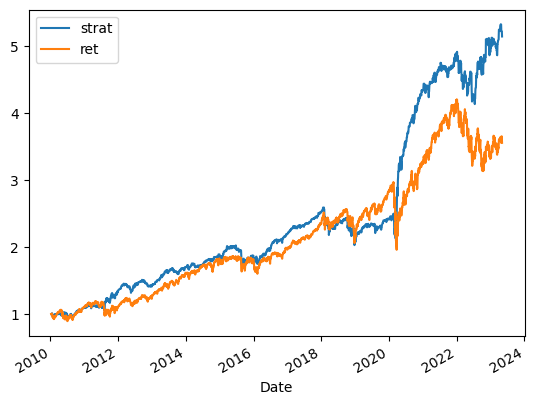

In [29]:
(df[['strat','ret']] + 1).cumprod().plot()

But our model is Overfitted

Split Dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=False)

In [32]:
X_train

,Lag_1,Lag_2,Lag_3
Date,,,
2010-01-08,0.004001,0.000546,0.003116
2010-01-11,0.002882,0.004001,0.000546
2010-01-12,0.001747,0.002882,0.004001
2010-01-13,-0.009381,0.001747,0.002882
2010-01-14,0.008326,-0.009381,0.001747
...,...,...,...
2019-05-01,0.000951,0.001072,0.004685
2019-05-02,-0.007502,0.000951,0.001072
2019-05-03,-0.002124,-0.007502,0.000951


In [33]:
X_test

,Lag_1,Lag_2,Lag_3
Date,,,
2019-05-08,-0.016512,-0.004471,0.009638
2019-05-09,-0.001605,-0.016512,-0.004471
2019-05-10,-0.003021,-0.001605,-0.016512
2019-05-13,0.003720,-0.003021,-0.001605
2019-05-14,-0.024131,0.003720,-0.003021
...,...,...,...
2023-04-28,0.019566,-0.003841,-0.015811
2023-05-01,0.008253,0.019566,-0.003841
2023-05-02,-0.000386,0.008253,0.019566


In [34]:
y_train

Date
2010-01-08    1
2010-01-11    1
2010-01-12    0
2010-01-13    1
2010-01-14    1
             ..
2019-05-01    0
2019-05-02    0
2019-05-03    1
2019-05-06    0
2019-05-07    0
Name: direction, Length: 2347, dtype: int32

In [35]:
y_test

Date
2019-05-08    0
2019-05-09    0
2019-05-10    1
2019-05-13    0
2019-05-14    1
             ..
2023-04-28    1
2023-05-01    0
2023-05-02    0
2023-05-03    0
2023-05-04    0
Name: direction, Length: 1006, dtype: int32

Train the model

In [36]:
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [37]:
X_test['prediction_LR'] = model.predict(X_test)

In [38]:
X_test

,Lag_1,Lag_2,Lag_3,prediction_LR
Date,,,,
2019-05-08,-0.016512,-0.004471,0.009638,1
2019-05-09,-0.001605,-0.016512,-0.004471,0
2019-05-10,-0.003021,-0.001605,-0.016512,1
2019-05-13,0.003720,-0.003021,-0.001605,0
2019-05-14,-0.024131,0.003720,-0.003021,1
...,...,...,...,...
2023-04-28,0.019566,-0.003841,-0.015811,0
2023-05-01,0.008253,0.019566,-0.003841,0
2023-05-02,-0.000386,0.008253,0.019566,0


In [39]:
X_test['ret'] = df.ret[X_test.index[0]:]

In [40]:
X_test

,Lag_1,Lag_2,Lag_3,prediction_LR,ret
Date,,,,,
2019-05-08,-0.016512,-0.004471,0.009638,1,-0.001605
2019-05-09,-0.001605,-0.016512,-0.004471,0,-0.003021
2019-05-10,-0.003021,-0.001605,-0.016512,1,0.003720
2019-05-13,0.003720,-0.003021,-0.001605,0,-0.024131
2019-05-14,-0.024131,0.003720,-0.003021,1,0.008016
...,...,...,...,...,...
2023-04-28,0.019566,-0.003841,-0.015811,0,0.008253
2023-05-01,0.008253,0.019566,-0.003841,0,-0.000386
2023-05-02,-0.000386,0.008253,0.019566,0,-0.011586


In [41]:
X_test['strat'] = X_test['prediction_LR'] * X_test.ret

In [42]:
(X_test[['strat','ret']] + 1).cumprod() - 1

,strat,ret
Date,,
2019-05-08,-0.001605,-0.001605
2019-05-09,-0.001605,-0.004622
2019-05-10,0.002109,-0.000919
2019-05-13,0.002109,-0.025027
2019-05-14,0.010142,-0.017212
...,...,...
2023-04-28,1.151390,0.445703
2023-05-01,1.151390,0.445145
2023-05-02,1.151390,0.428401


<AxesSubplot: xlabel='Date'>

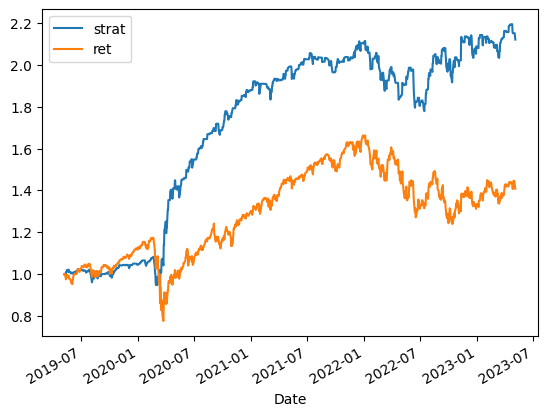

In [43]:
(X_test[['strat','ret']] + 1).cumprod().plot()